__supervised algorithm for both calssification and regression__

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Motivating Support Vector Machines
In Bayesian classification, we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points. That was an example of **generative** classification; here we will consider instead **discriminative** classification: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions)
that divides the classes from each other.

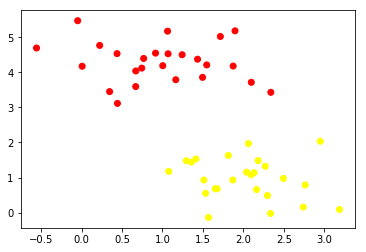

In [36]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0,
                cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn');

__we can draw a number of lines separating the data... but which will be best?__ , 

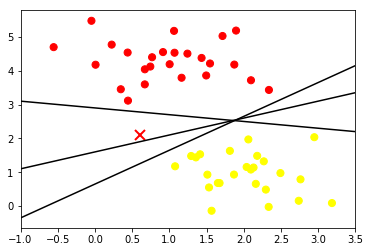

In [37]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# draw separation lines
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, '-k');
    
plt.xlim(-1, 3.5);

### Support Vector Machines: Maximizing the Margin

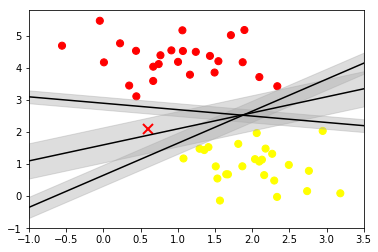

In [38]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b, d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none', color='#AAAAAA',
                    alpha=0.4)

plt.xlim(-1, 3.5);

#### Fixing a support vector machine

In [39]:
from sklearn.svm import SVC  # support vector classifier
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
# use a convinience function to see what's happening
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2-D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

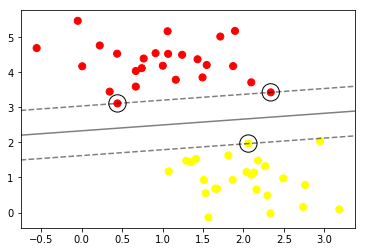

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [46]:
# the support vectors
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

A key to this classifier’s success is that for the fit, only the position of the support vectors matters; any points further from the margin that are on the correct side do not modify the fit!

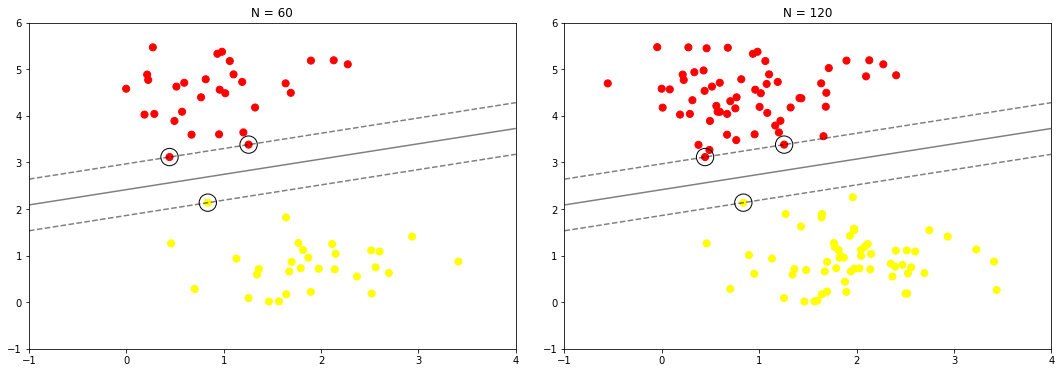

In [48]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
    random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

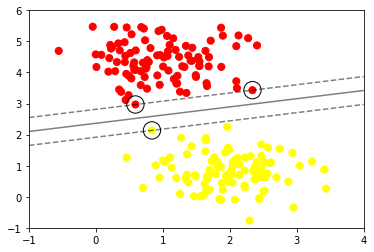

In [49]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

#### Beyond Linear Boundaries: Kernel SVM

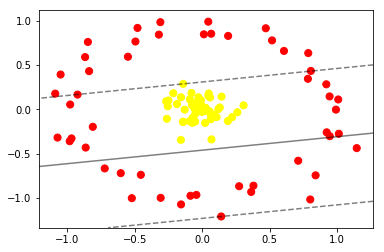

In [57]:
# motivation: linearly non-separable data
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

We can project the data into a higher dimension such that a linear separator will be sufficient

In [66]:
r = np.exp(-(X ** 2).sum(1))
#r = (-X**2).sum(1)

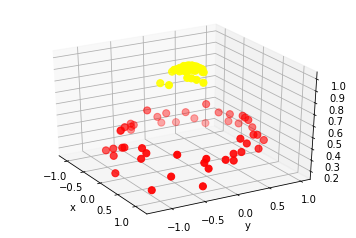

In [71]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
X=fixed(X), y=fixed(y));

using the radial basis function as the kernel hyperparameter

In [72]:
clf = SVC(kernel='rbf', C=1e6, )
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

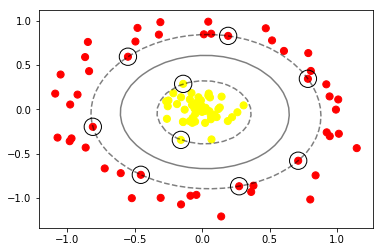

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

#### Tuning the SVM: Softening margins

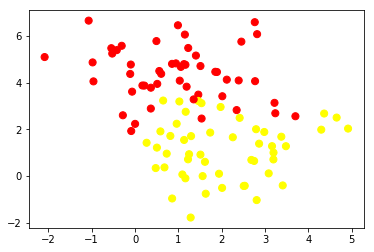

In [78]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

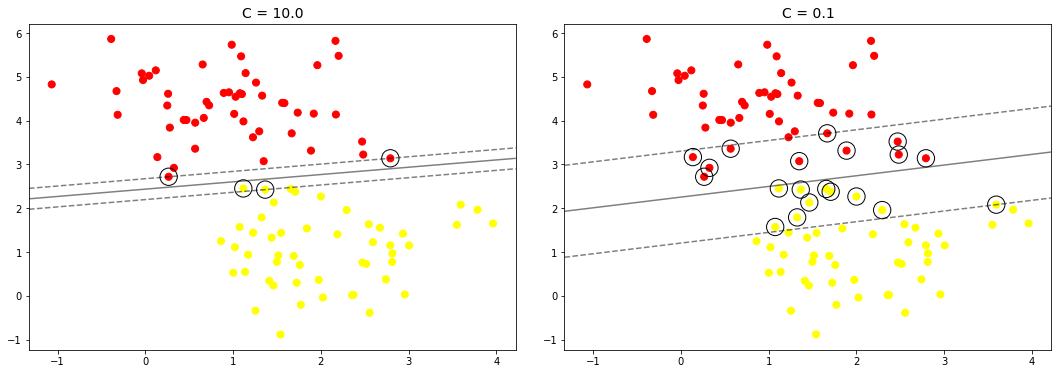

In [96]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1,2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='autumn')
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none');
    
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Example: Face Recognition

In [102]:
# from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


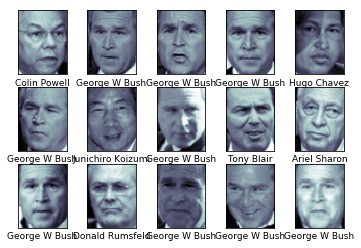

In [113]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])
    axi.set_xlabel(faces.target_names[faces.target[i]],fontdict={'fontsize':9})

In [127]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized', n_components=150, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [128]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)

In [129]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 26.1 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we
would want to expand the grid to make sure we have found the true optimum.

In [130]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

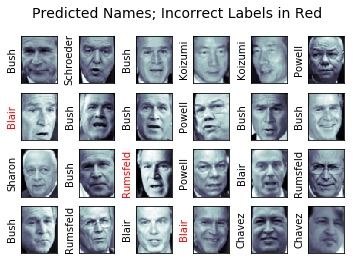

In [131]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [132]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.63      0.80      0.71        15
     Colin Powell       0.85      0.88      0.86        68
  Donald Rumsfeld       0.73      0.87      0.79        31
    George W Bush       0.94      0.83      0.88       126
Gerhard Schroeder       0.85      0.74      0.79        23
      Hugo Chavez       0.89      0.80      0.84        20
Junichiro Koizumi       0.85      0.92      0.88        12
       Tony Blair       0.79      0.90      0.84        42

      avg / total       0.86      0.85      0.85       337



C:\Users\Aroogz\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Users\Aroogz\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


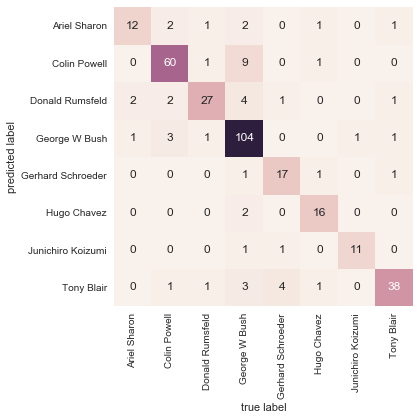

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');